# Udacity CAREER DEVELOPMENT

## &#x1F3E2; &nbsp; Technical Interview Practice. Project

### &#x1F4D1; &nbsp; Links
#### Classes (python): https://docs.python.org/3.3/tutorial/classes.html
#### Data structures: https://docs.python.org/2/tutorial/datastructures.html
#### Problem Solving with Algorithms and Data Structures using Python: https://interactivepython.org/runestone/static/pythonds/index.html
#### NetworkX: https://networkx.github.io/documentation/networkx-1.10/overview.html

### &#x1F4D1; &nbsp; Submission Instructions
- For each question, create a solution in Python (version 2). All solutions should be functions named as “question1”, “question2”, et cetera. Feel free to make additional helper functions or classes as needed. Code solutions must be in a file called "solutions.py".
- In the same .py file, include at least 3 test cases for each solution. For each test case, write the function call with the input you want to test and print it to the console, like "print question1()". On the next line, comment out the output you expect to see from that function call. At least 2 of these must be edge cases, testing inputs such as null values, empty inputs, unusually large values, et cetera.
- Write up an explanation for each question in a single separate text file (called "explanations.txt"). Your paragraph should not be a detailed walkthrough of the code you provided, but provide your reasoning behind decisions made in the code. For example, why did you use that data structure? You also need to explain the efficiency (time and space) of your solution.
- Compress your one Python and one text file into a .zip, and submit.

###  &#x1F4D1; &nbsp; Question 1
Given two strings s and t, determine whether some anagram of t is a substring of s.

For example: if s = "udacity" and t = "ad", then the function returns True.

Your function definition should look like: question1(s, t) and return a boolean True or False.

###  &#x1F4D1; &nbsp; Solution 1

In [18]:
import numpy as np
def question1(s, t):
    (result, indices) = (True, [])
    
    for element in list(t):
        boolean = element in (list(s))
        if boolean == False: 
            (result, indices) = (False,[])
        else:
            indices.append(list(s).index(element))
            result = np.logical_and(result, boolean)
    
    if (result == True) & (sum(map(abs, np.diff(indices))) == len(indices) - 1):
        return True
    else: return False

### &#x1F52C; &nbsp; Test 1

In [19]:
s = "udacity"
t = ["cit", "ad", "mod"]
for el in t:
    print (el + " in " + s + " : " + str(question1(s, el)))

cit in udacity : True
ad in udacity : True
mod in udacity : False


### &#x1F52C; &nbsp;  Explanation 1

The solution is based on the clear reasons:

- creating the lists of elements from both strings list() is needed for analysis;
- the use the boolean AND np.logical_and() gives the result "True" if all symbols from the second string are in the first one;
- the list of indices of the first string for elements from the second string is made in the same loop;
- applying functions for the indices [sum(), map(), abs(), .diff()] helps to find exactly anagrams: if sorted indices have the absolute values of differences 1 and therefore symbols from the second string stand consecutively in the first one then the function returns "True".

Efficiency:



###  &#x1F4D1; &nbsp; Question 2
Given a string a, find the longest palindromic substring contained in a.

Your function definition should look like question2(a), and return a string.

###  &#x1F4D1; &nbsp; Solution 2

In [3]:
# Solution with helper functions
def question2(a):
    result = search_palindrome_in(a)
    if (len(list(a)) == 0):        
        return '' 
    elif (len(list(a)) == 1) | (result == []):
        if 'a' in list(a):
            return 'a'
        else:
            return None
    else:
        max_length = max(len(s) for s in result)
        longest_result = [s for s in result if len(s) == max_length]
        return longest_result[0]

def search_palindrome_in(string):
    palindromes = []
    cuts = cut_collection(string)
    for element in cuts:
        substrings = sub_collection(element)
        for el in substrings:
            if is_palindrome(el):
                palindromes.append(el)
    return palindromes
    
def is_palindrome(string):
    if string == "":
        return True
    else:
        if string[0] == string[-1]:
            return is_palindrome(string[1:-1])
        else:
            return False
        
def sub_collection(string):
    sub_string = list(string)
    sub_collection = []
    for i in range(len(sub_string)+1):
        join_string = "".join(sub_string[:i])
        sub_collection.append(join_string )   
    sub_collection = sub_collection[2:len(sub_string)+1]
    return sub_collection     

def cut_collection(string):
    cut_collection = []
    current = string
    for i in range(len(list(string))+1):
        cut_collection.append(current)
        cut_string = current[1:]
        current = cut_string
    cut_collection = cut_collection[:len(list(string))-1]
    return cut_collection

### &#x1F52C; &nbsp; Test 2

In [4]:
test_cases = ['', 'test', 'mart', 'letter', 'parallelogram', 'radarrotator']
for test in test_cases:   
#    print (list(test))
#    print (string_collection(test))
#    print (cut_collection(test))
#    print (search_palindrome_in(test))
    print (question2(test))


None
a
ette
ara
rotator


### &#x1F52C; &nbsp; Explanation 2

###  &#x1F4D1; &nbsp; Question 3
Given an undirected graph G, find the minimum spanning tree within G.

A minimum spanning tree connects all vertices in a graph with the smallest possible total weight of edges. 

Your function should take in and return an adjacency list structured like this:

In [5]:
{'A': [('B', 2)],
 'B': [('A', 2), ('C', 5)], 
 'C': [('B', 5)]}

{'A': [('B', 2)], 'B': [('A', 2), ('C', 5)], 'C': [('B', 5)]}

Vertices are represented as unique strings. The function definition should be question3(G)

###  &#x1F4D1; &nbsp; Solution 3

In [6]:
import networkx as nx
from collections import OrderedDict
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
def question3(G):
    GW = create_wgraph(G)
    MST = nx.minimum_spanning_tree(GW)
    D = create_wdictionary(MST)
    OD = OrderedDict(sorted(D.items(), key=lambda t: t[0]))
    return OD

def create_wgraph(G):
    W = nx.Graph()
    for n, edges in G.items():
        for (u,v) in edges:
            W.add_edge(n, u, weight=v)
    return W

def create_wdictionary(W):
    D ={}
    Ws = nx.get_edge_attributes(W,'weight')
    for ((u,v), n) in Ws.items():
        D[u] = [(v, n)]
    return D

### &#x1F52C; &nbsp;  Test 3

In [8]:
G = {'A': [('B', 2), ('D', 6), ('G', 4), ('J', 3)],
     'B': [('A', 2), ('C', 5)], 
     'C': [('B', 5), ('E', 5)],
     'D': [('A', 6), ('E', 8)],
     'E': [('C', 5), ('D', 8), ('F', 3)],
     'F': [('E', 3), ('G', 7)],
     'G': [('A', 4), ('F', 7), ('H', 8), ('I', 3)],
     'H': [('G', 8)], 
     'I': [('G', 3), ('J', 7)],
     'J': [('A', 3), ('I', 7)]}

WG = create_wgraph(G)
weights = nx.get_edge_attributes(WG,'weight')
print (weights)
print('')
print ('-----------------------------------------------------------------------------------------------------------')
print('')
MST = nx.minimum_spanning_tree(WG)
weightsMST = nx.get_edge_attributes(MST,'weight')
print (weightsMST)
print('')
print ('-----------------------------------------------------------------------------------------------------------')
print('')
print (create_wdictionary(MST))
print('')
print ('-----------------------------------------------------------------------------------------------------------')
print('')
print (question3(G))

{('C', 'B'): 5, ('J', 'I'): 7, ('J', 'A'): 3, ('A', 'B'): 2, ('C', 'E'): 5, ('G', 'F'): 7, ('G', 'I'): 3, ('G', 'A'): 4, ('E', 'D'): 8, ('G', 'H'): 8, ('D', 'A'): 6, ('E', 'F'): 3}

-----------------------------------------------------------------------------------------------------------

{('C', 'B'): 5, ('G', 'I'): 3, ('J', 'A'): 3, ('G', 'A'): 4, ('A', 'B'): 2, ('G', 'H'): 8, ('E', 'F'): 3, ('D', 'A'): 6, ('C', 'E'): 5}

-----------------------------------------------------------------------------------------------------------

{'G': [('H', 8)], 'J': [('A', 3)], 'C': [('E', 5)], 'E': [('F', 3)], 'D': [('A', 6)], 'A': [('B', 2)]}

-----------------------------------------------------------------------------------------------------------

OrderedDict([('A', [('B', 2)]), ('C', [('E', 5)]), ('D', [('A', 6)]), ('E', [('F', 3)]), ('G', [('H', 8)]), ('J', [('A', 3)])])


{('G', 'H'): 8, ('E', 'C'): 5, ('G', 'F'): 7, ('J', 'I'): 7, ('A', 'G'): 4, ('E', 'F'): 3, ('B', 'C'): 5, ('A', 'D'): 6, ('A', 'B'): 2, ('D', 'E'): 8, ('A', 'J'): 3, ('G', 'I'): 3}


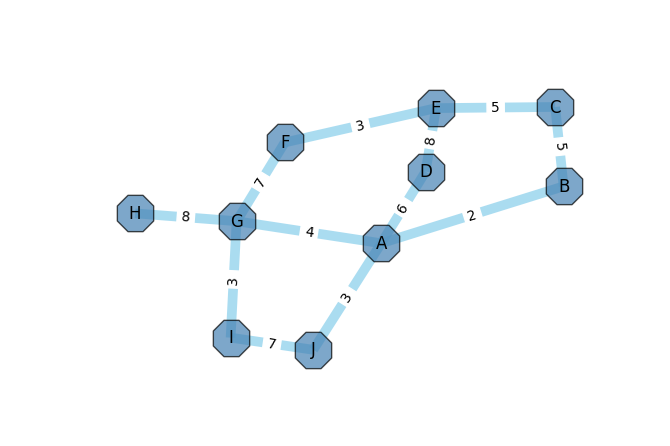

In [68]:
pos=nx.fruchterman_reingold_layout(WG)
nx.draw(WG, pos, with_labels=True, node_shape='8', node_size=800, 
        node_color='steelblue', edge_color='skyblue', width=7, alpha=0.7)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=weights)
print (weights)

{('G', 'H'): 8, ('E', 'C'): 5, ('A', 'D'): 6, ('A', 'B'): 2, ('F', 'E'): 3, ('B', 'C'): 5, ('A', 'J'): 3, ('G', 'I'): 3, ('A', 'G'): 4}


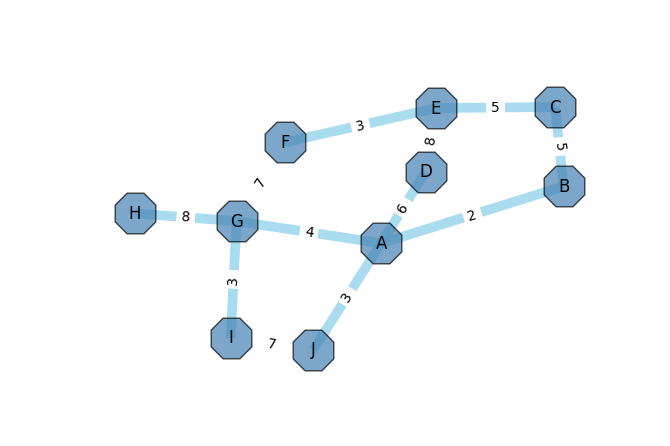

In [69]:
nx.draw(MST, pos, with_labels=True, node_shape='8', node_size=1000, 
        node_color='steelblue', edge_color='skyblue', width=7, alpha=0.7)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=weights)
print (weightsMST)

In [18]:
G1 = {'A': [('B', 2), ('D', 6), ('G', 4), ('J', 3)],
      'B': [('A', 2), ('C', 5), ('L', 4)], 
      'C': [('B', 5), ('E', 5), ('K', 8)],
      'D': [('A', 6), ('E', 8)],
      'E': [('C', 5), ('D', 8), ('F', 3)],
      'F': [('E', 3), ('G', 7)],
      'G': [('A', 4), ('F', 7), ('H', 8), ('I', 3)],
      'H': [('G', 8), ('K', 5), ('O', 2)], 
      'I': [('G', 3), ('J', 7), ('N', 4)],
      'J': [('A', 3), ('I', 7)],
      'K': [('C', 8), ('H', 5), ('L', 3)],  
      'L': [('B', 4), ('K', 3), ('M', 2)],
      'M': [('L', 2), ('N', 7)],
      'N': [('I', 4), ('M', 7), ('O', 5)],
      'O': [('N', 5), ('H', 2)]}
WG1 = create_wgraph(G1)
weights1 = nx.get_edge_attributes(WG1,'weight')
MST1 = nx.minimum_spanning_tree(WG1)
weightsMST1 = nx.get_edge_attributes(MST1,'weight')

{('C', 'B'): 5, ('B', 'L'): 4, ('B', 'A'): 2, ('I', 'N'): 4, ('J', 'I'): 7, ('J', 'A'): 3, ('C', 'K'): 8, ('D', 'A'): 6, ('M', 'N'): 7, ('G', 'F'): 7, ('O', 'H'): 2, ('K', 'L'): 3, ('G', 'I'): 3, ('K', 'H'): 5, ('G', 'A'): 4, ('E', 'D'): 8, ('G', 'H'): 8, ('O', 'N'): 5, ('C', 'E'): 5, ('M', 'L'): 2, ('E', 'F'): 3}


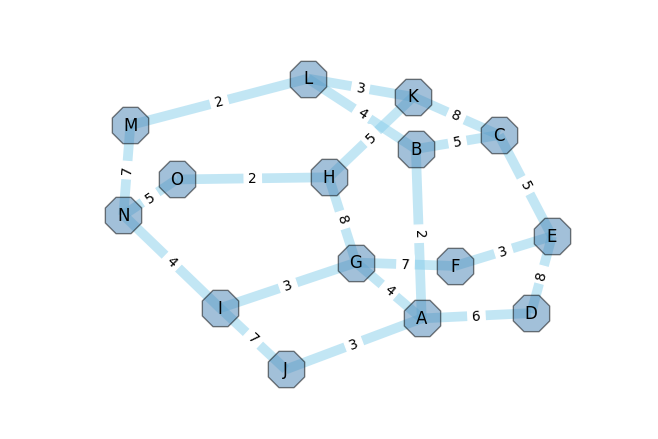

In [17]:
pos1=nx.fruchterman_reingold_layout(WG1)
nx.draw(WG1, pos1, with_labels=True, node_shape='8', node_size=800, 
        node_color='steelblue', edge_color='skyblue', width=7, alpha=0.5)
nx.draw_networkx_edge_labels(WG1, pos1, edge_labels=weights1)
print (weights1)

{('C', 'B'): 5, ('I', 'N'): 4, ('C', 'E'): 5, ('A', 'B'): 2, ('L', 'B'): 4, ('H', 'O'): 2, ('G', 'I'): 3, ('K', 'H'): 5, ('G', 'A'): 4, ('K', 'L'): 3, ('E', 'F'): 3, ('D', 'A'): 6, ('M', 'L'): 2, ('J', 'A'): 3}


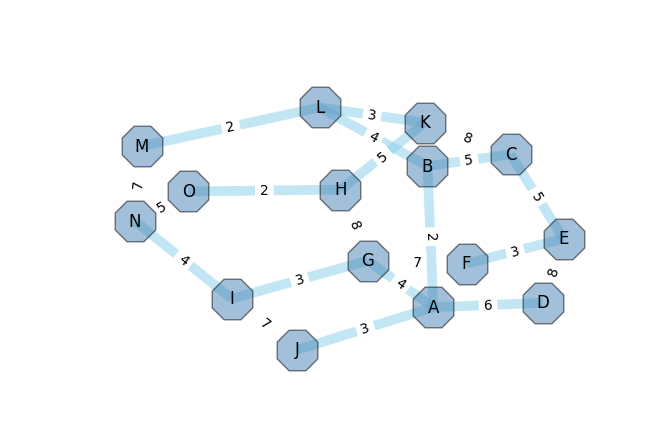

In [19]:
nx.draw(MST1, pos1, with_labels=True, node_shape='8', node_size=1000, 
        node_color='steelblue', edge_color='skyblue', width=7, alpha=0.5)
nx.draw_networkx_edge_labels(WG1, pos1, edge_labels=weights1)
print (weightsMST1)

In [10]:
print (question3(G1))

OrderedDict([('A', [('B', 2)]), ('C', [('E', 5)]), ('D', [('A', 6)]), ('E', [('F', 3)]), ('G', [('A', 4)]), ('H', [('O', 2)]), ('I', [('N', 4)]), ('J', [('A', 3)]), ('K', [('L', 3)]), ('L', [('B', 4)]), ('M', [('L', 2)])])


### &#x1F52C; &nbsp; Explanation 3

###  &#x1F4D1; &nbsp; Question 4
Find the least common ancestor between two nodes on a binary search tree. 

The least common ancestor is the farthest node from the root that is an ancestor of both nodes. 

For example, the root is a common ancestor of all nodes on the tree, but if both nodes are descendents 

of the root's left child, then that left child might be the lowest common ancestor. 

You can assume that both nodes are in the tree, and the tree itself adheres to all BST properties. 

The function definition should look like question4(T, r, n1, n2), where T is the tree represented as a matrix, 

where the index of the list is equal to the integer stored in that node and a 1 represents a child node, 

r is a non-negative integer representing the root, and n1 and n2 are non-negative integers representing 

the two nodes in no particular order. For example, one test case might be

In [ ]:
question4([[0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [1, 0, 0, 0, 1],
           [0, 0, 0, 0, 0]],
          3,
          1,
          4)

and the answer would be 3.

###  &#x1F4D1; &nbsp; Solution 4

In [21]:
import scipy as sp
import pandas as pd

In [22]:
def question4(T, node1, node2, root):
    DF = create_df(T)
    BTG = create_graph(DF)

    if BTG != None:   
        nodes = nx.dijkstra_path(BTG, node1, node2)
    
        shortest_paths_nodes = []
        for element in nodes:
            shortest_paths_nodes.append(nx.shortest_path(BTG, root, element))
        
        index = []
        for path in shortest_paths_nodes:
            index.append(len(path))
        root_path_nodes = shortest_paths_nodes[min(index)]
    
        result = list(set(nodes) & set(root_path_nodes))
        return result[0]
    
    else: 
        print ("This graph is not a binary search tree")
        return None        
    
def create_df(T):
    BT = np.matrix(T)
    sparse = sp.sparse.coo_matrix(BT, dtype=np.int32)
    nodes = range(BT.shape[0])
    DF = pd.DataFrame(sparse.toarray(), index=nodes, columns=nodes)
    return DF
    
def create_graph(DF):
    BTG = nx.Graph()
    BTG.add_nodes_from(list(DF.index))
    for i in range(DF.shape[0]):
        column_label = DF.columns[i]
        for j in range(DF.shape[1]):
            row_label = DF.index[j]
            node = DF.iloc[i,j]
            if node == 1:
                BTG.add_edge(column_label,row_label)
    if nx.is_tree(BTG):
        return BTG
    else:
        return None

### &#x1F52C; &nbsp; Test 4

In [23]:
T = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

BT = np.matrix(T)
node1, node2, root = (12, 14, 0)
BT.shape[0]

15

In [24]:
sparse = sp.sparse.coo_matrix(BT, dtype=np.int32)
nodes = range(BT.shape[0])
DF = pd.DataFrame(sparse.toarray(), index=nodes, columns=nodes)
print (DF)
print (list(DF.index))

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
1    1   0   0   1   1   0   0   0   0   0   0   0   0   0   0
2    1   0   0   0   0   1   1   0   0   0   0   0   0   0   0
3    0   1   0   0   0   0   0   1   1   0   0   0   0   0   0
4    0   1   0   0   0   0   0   0   0   1   1   0   0   0   0
5    0   0   1   0   0   0   0   0   0   0   0   1   1   0   0
6    0   0   1   0   0   0   0   0   0   0   0   0   0   1   1
7    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
8    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
9    0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
10   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
11   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
12   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
13   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
14   0   0   0   0   0   0   1   0   0   0   0   0   0 

In [25]:
BTG = nx.Graph()
BTG.add_nodes_from(nodes)
for i in range(DF.shape[0]):
    column_label = DF.columns[i]
    for j in range(DF.shape[1]):
        row_label = DF.index[j]
        node = DF.iloc[i,j]
        if node == 1:
            BTG.add_edge(column_label,row_label)
nx.is_tree(BTG)

True

In [26]:
nodes = nx.dijkstra_path(BTG, 12, 14)
nodes

[12, 5, 2, 6, 14]

In [27]:
dijkstra_path = []
for i in range(len(nodes)-1):   
    dijkstra_path.append((nodes[i], nodes[i+1]))
dijkstra_path

[(12, 5), (5, 2), (2, 6), (6, 14)]

In [28]:
shortest_paths_nodes = []
for element in nodes:
    shortest_paths_nodes.append(nx.shortest_path(BTG, 0, element))
shortest_paths_nodes

[[0, 2, 5, 12], [0, 2, 5], [0, 2], [0, 2, 6], [0, 2, 6, 14]]

In [29]:
index = []
for path in shortest_paths_nodes:
    index.append(len(path))
root_path_nodes = shortest_paths_nodes[min(index)]
root_path_nodes

[0, 2]

In [30]:
shortest_path_root = []
for i in range(len(root_path_nodes)-1):   
    shortest_path_root.append((root_path_nodes[i], root_path_nodes[i+1]))
shortest_path_root

[(0, 2)]

In [31]:
result = list(set(nodes) & set(root_path_nodes))
result[0]

2

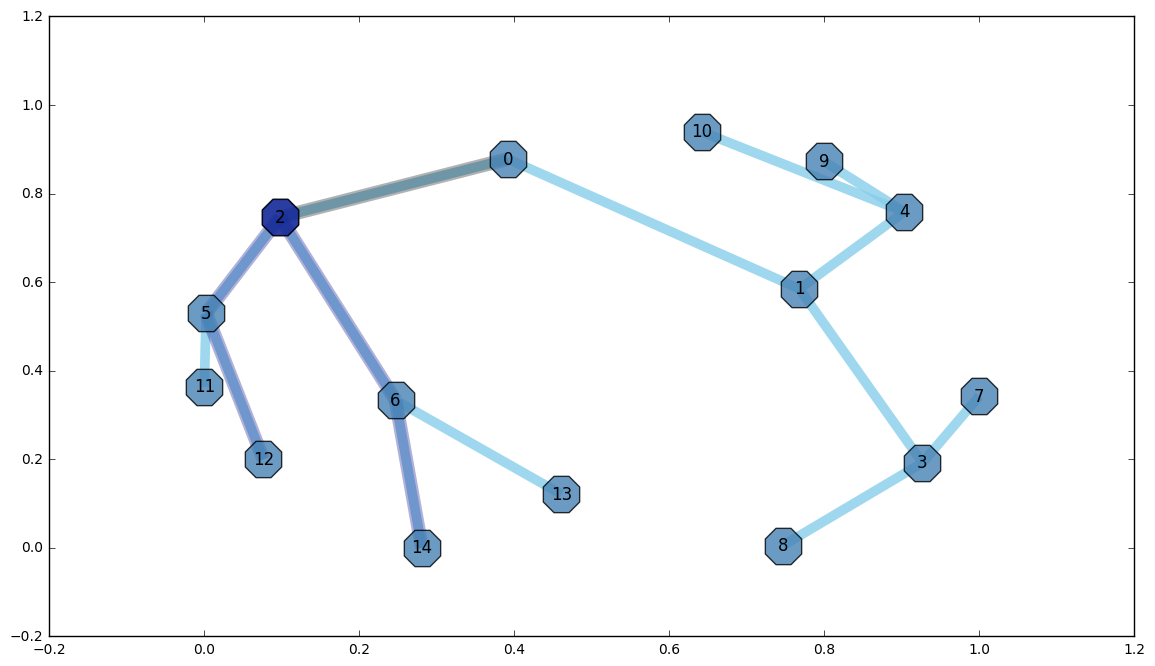

In [118]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 8)
pos=nx.fruchterman_reingold_layout(BTG)
nx.draw_networkx(BTG, pos, with_labels=True, 
                 node_shape='8', node_size=800, node_color='steelblue', 
                 edge_color='skyblue', width=7, alpha=0.8)
nx.draw_networkx_edges(BTG, pos, edgelist=dijkstra_path,
                       edge_color = 'navy', width=10, alpha=0.3)
nx.draw_networkx_edges(BTG, pos, edgelist=shortest_path_root,
                       edge_color = 'black', width=10, alpha=0.3)
nx.draw_networkx_nodes(BTG, pos, nodelist=result,
                    node_shape='8', node_size=800, node_color='darkblue', alpha=0.6)

In [120]:
pos0 = {0: [ 0.42009075,  0.61535423], 
        1: [ 0.6099448 ,  0.28029755], 
        2: [ 0.28414524,  0.93253065], 
        3: [ 0.96112175,  0.32472961], 
        4: [ 0.39534523,  0.01803362], 
        5: [ 0.55470795,  0.96700595], 
        6: [ 0.0775995 ,  0.75897483], 
        7: [ 0.87750575,  0.15936774], 
        8: [ 1.       ,  0.5493866], 
        9: [ 0.1819502 ,  0.09913342], 
        10: [ 0.59061407,  0.        ], 
        11: [ 0.73195428,  0.94294233], 
        12: [ 0.82716582,  0.80770493], 
        13: [ 0.        ,  0.43491463], 
        14: [ 0.00316343,  0.61103969]}                  

In [34]:
# Final test
T0 = [[0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0]]
print (T0)
print(question4(T0, 2, 4, 0))

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
This graph is not a binary search tree
None


In [40]:
print('The least common ancestor between 12 and 14 for T (root 0)', question4(T, 12, 14, 0))

The least common ancestor between 12 and 14 for T (root 0) 2


In [41]:
T1 = [[0, 1, 1, 0, 0, 0, 0],
      [1, 0, 0, 1, 1, 0, 0],
      [1, 0, 0, 0, 0, 1, 1],
      [0, 1, 0, 0, 0, 0, 0],
      [0, 1, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0]]     
print('The least common ancestor between 2 and 4 for T1 (root 0)', question4(T1, 2, 4, 0))

The least common ancestor between 2 and 4 for T1 (root 0) 0


### &#x1F52C; &nbsp; Explanation 4

###  &#x1F4D1; &nbsp; Question 5. Variant 1
Find the element in a singly linked list that's m elements from the end. 

For example, if a linked list has 5 elements, the 3rd element from the end is the 3rd element. 

The function definition should look like question5(ll, m), 

where ll is the first node of a linked list and m is the "mth number from the end".

You should copy/paste the Node class below to use as a representation of a node in the linked list. 

Return the value of the node at that position.

### The proposed version of the problem formulation. Variant 2

Create a class LinkedList for singly linked lists. Convert the list into this class.

Find the element in the created list that's m elements from the end. 

For example, if a linked list has 5 elements, the 3rd element from the end is the 3rd element. 

The function definition should look like question5(l, m), 

where l is the initial list and m is the "mth number from the end in the linked list".

You should copy/paste the Node class below to use as a representation of a node in the linked list. 

Return the value of the node at that position.

In [ ]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.next = None

###  &#x1F4D1; &nbsp; Solution 5. Variant 2

In [103]:
def question5(l, m):
    ll = create_linked_list(l)
    return ll.getItemLeft(m)

def create_linked_list(L):
    linked_list = LinkedList()
    for el in L:
        linked_list.add(el)
    return linked_list

def create_linked_list_left(L):
    linked_list = LinkedList()
    for el in L:
        linked_list.addLeft(el)
    return linked_list

class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        
    def __repr__(self):
        return str(self.data)

class LinkedList:
    def __init__(self):
        self.head = None
        
    def addLeft(self, data):
        new_node = Node(data)
        new_node.next = self.head 
        self.head = new_node
        
    def add(self, data):
        new_node = Node(data)
        if self.head == None:
            self.head = new_node
        else:
            current_node = self.head
            while current_node.next:
                current_node = current_node.next
            current_node.next = new_node
        
    def getLength(self):
        current = self.head
        count = 1
        while current.next != None:
            count += 1
            current = current.next
        return count
    
    def getIndex(self, data):
        current_node = self.head        
        index = 1
        while current_node.next:
            if current_node.data == data:
                break
            else:     
                current_node = current_node.next
                index += 1
        if (index == self.getLength()) & (current_node.data != data):
            print ("This item is not in the list")
            return None
        return index
    
    def getIndexLeft(self, data):
        if self.getIndex(data) == None:
            return None
        else: 
            pos = int(self.getIndex(data))
            end = int(self.getLength())
            return end - pos + 1
    
    def getItem(self, position):
        if position > self.getLength():
            print ("This index is out of the list range")
            return None
        else:
            current_node = self.head
            while (current_node.next != None):
                if self.getIndex(current_node.data) == position:
                    break
                else:
                    current_node = current_node.next
            return current_node.data
        
    def getItemLeft(self, position):
        if position > self.getLength():
            print ("This index is out of the list range")
            return None
        else:
            end = int(self.getLength())
            pos = end - position + 1
            return self.getItem(pos)
                    
    def insertItem(self, data, position):
        if position > int(self.getLength()) + 1:
            print ("This index is out of the list range")
        else:
            pos = 1
            node = Node(data)
            current_node = self.head
        
            if position == 1:
                self.head = current_node
            
            elif position > 1:
                while current_node and pos - 1 < position:
                    if pos == position - 1:
                        node.next = current_node.next
                        current_node.next = node
                    current_node = current_node.next
                    pos += 1 
                           
    def deleteItem(self, data):
        if (self.getIndex(data) == None):
            print ("This item is not in the list")        
        else:
            node = Node(data)
            current_node = self.head
            previous_node = None
        while (current_node.data != data) & (current_node.next != None):
            previous_node = current_node
            current_node = current_node.next
        if current_node.data == data:
            if previous_node != None:
                previous_node.next = current_node.next
            else:
                self.head = current_node.next

    def displayLinkedList(self):
        node = self.head
        node_list = []
        while node:
            node_list.append(node.data)
            node = node.next
        return node_list

### &#x1F52C; &nbsp; Test 5

In [104]:
node = Node(34)
node

34

In [105]:
test_list = create_linked_list(['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh'])
test_list2 = create_linked_list([i for i in range(10)])
test_list3 = create_linked_list_left(['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh'])
test_list4 = create_linked_list_left([i for i in range(10)])

In [106]:
print (test_list.getLength())
print (test_list2.getLength())

8
10


In [107]:
print (test_list.getIndex('ccc'))
print (test_list.getIndex('o'))
print (test_list2.getIndex(9))
print (test_list2.getIndex(100))

3
This item is not in the list
None
10
This item is not in the list
None


In [108]:
print (test_list.getIndexLeft('ccc'))
print (test_list.getIndexLeft('o'))
print (test_list2.getIndexLeft(9))
print (test_list2.getIndexLeft(100))

6
This item is not in the list
None
1
This item is not in the list
None


In [109]:
print (test_list.getItem(8))
print (test_list.getItem(10))
print (test_list2.getItem(3))
print (test_list2.getItem(12))

hhh
This index is out of the list range
None
2
This index is out of the list range
None


In [110]:
print (test_list.getItemLeft(8))
print (test_list.getItemLeft(10))
print (test_list2.getItemLeft(3))
print (test_list2.getItemLeft(12))

aaa
This index is out of the list range
None
7
This index is out of the list range
None


In [111]:
test_list.insertItem('iii', 9)
test_list.insertItem('jjj', 10)
test_list2.insertItem(10, 11)
test_list2.insertItem(11, 12)

In [112]:
test_list2.insertItem(20, 100)

This index is out of the list range


In [113]:
print (test_list.displayLinkedList())
print (test_list2.displayLinkedList())
print (test_list3.displayLinkedList())
print (test_list4.displayLinkedList())

['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
['hhh', 'ggg', 'fff', 'eee', 'ddd', 'ccc', 'bbb', 'aaa']
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [114]:
test_list.deleteItem('ddd')
test_list2.deleteItem(10)
print (test_list.displayLinkedList())
print (test_list2.displayLinkedList())

['aaa', 'bbb', 'ccc', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]


In [115]:
# final test
print (question5(['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh'], 3))
print (question5(['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh'], 20))   
print (question5([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 8))
print (question5([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 100))

fff
This index is out of the list range
None
4
This index is out of the list range
None


### &#x1F52C; &nbsp; Explanation 5